# Modification of time

In this section we will show you how to modify the timeslicing arrangement as well as change the time horizon and year intervals by modifying the ```settings.toml``` file.

## Modify timeslicing

Timeslicing is the division of a year into multiple different sections. For example, we could slice the year into different seasons, make a distinction between weekday and weekend as well as a distinction between morning and night. We do this as energy demand profiles all show a difference between these timeslices. eg. Electricity consumption is lower during the night than during the day.

To achieve this, we have to modify the ```settings.toml``` file, as well as the files within the preset folder: ```Residential2020Consumption.csv``` and ```Residential2050Consumption.csv```. This is so that we can edit the demand for the residential sector for the new timeslices.

First we edit the ```settings.toml``` file to add two additional timeslices: early-morning and late-afternoon:

    [timeslices]
    all-year.all-week.night = 1095
    all-year.all-week.morning = 1095
    all-year.all-week.afternoon = 1095
    all-year.all-week.early-peak = 1095
    all-year.all-week.late-peak = 1095
    all-year.all-week.evening = 1095
    all-year.all-week.early-morning = 1095
    all-year.all-week.late-afternoon = 1095
    level_names = ["month", "day", "hour"]
    
 secondly, we modify both Residential Consumption files. Again, we put the text in bold for the modified entries. We must add the demand for the two additional timelsices, which we call timeslice 7 and 8. We make the demand for heat to be 2 for both of the new timeslices.

Below is the modified ```Residential2020Consumption.csv``` file:
 
||RegionName|ProcessName|Timeslice|electricity|gas|heat|CO2f|wind|
|-|-|-|-|-|-|-|-|-|
|0|R1|gasboiler|1|0|0|1|0|0|
|1|R1|gasboiler|2|0|0|1.5|0|0|
|2|R1|gasboiler|3|0|0|1|0|0|
|3|R1|gasboiler|4|0|0|1.5|0|0|
|4|R1|gasboiler|5|0|0|3|0|0|
|5|R1|gasboiler|6|0|0|2|0|0|
|**6**|**R1**|**gasboiler**|**7**|**0**|**0**|**2**|**0**|**0**|
|**7**|**R1**|**gasboiler**|**8**|**0**|**0**|**2**|**0**|**0**|
|0|R2|gasboiler|1|0|0|1|0|0|
|1|R2|gasboiler|2|0|0|1.5|0|0|
|2|R2|gasboiler|3|0|0|1|0|0|
|3|R2|gasboiler|4|0|0|1.5|0|0|
|4|R2|gasboiler|5|0|0|3|0|0|
|5|R2|gasboiler|6|0|0|2|0|0|
|**6**|**R2**|**gasboiler**|**7**|**0**|**0**|**2**|**0**|**0**|
|**7**|**R2**|**gasboiler**|**8**|**0**|**0**|**2**|**0**|**0**|

We do the same for the ```Residential2050Consumption.csv```, however this time we make the demand for heat in 2050 to both be 5 for the new timeslices. See [here INSERT LINK HERE](github-residential2050) for the full file.
 
As we have modified the timeslicing arrangements there will be a change in the underlying demand for heating. This may require more electricity to service the demand for heat. Therefore, we relax the constraints for growth in ```windturbine``` in region "R2" in the ```technodata/power/technodata.csv``` file, as well as the constraints for ```heatpump```, again in region "R2". For the full power sector ```technodata.csv``` file click [here INSERT LINK HERE](github-power-technodata), and for the full residential sector ```technodata.csv``` file click [here INSERT LINK HERE](github-residential-technodata).

Once the relevant files have been edited, we are able to run the simulation model using ```python -m muse settings.toml```.

Then, once run, we import the necessary packages:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

and visualise the relevant data:

gas sector:


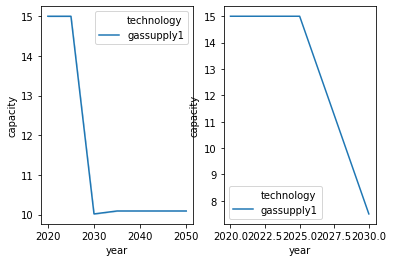

power sector:


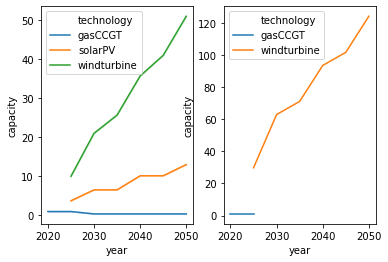

residential sector:


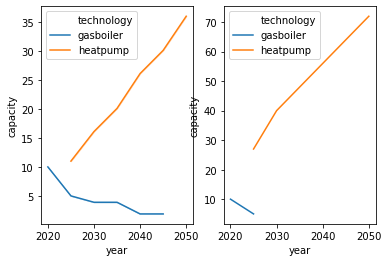

In [35]:
mca_capacity = pd.read_csv("../Results/MCACapacity.csv")

for name, sector in mca_capacity.groupby("sector"):
    print("{} sector:".format(name))
    fig, ax =plt.subplots(1,2)
    sns.lineplot(data=sector[sector.region=="R1"], x="year", y="capacity", hue="technology", ax=ax[0])
    sns.lineplot(data=sector[sector.region=="R2"], x="year", y="capacity", hue="technology", ax=ax[1])
    plt.show()
    plt.close()

Compared to the scenario where we added a [region](add-region.ipynb), there is a slight increase in solarPV in the power sector. However, the rest remains unchanged. 

## Modify time horizon and time periods

For the previous examples, we have run the scenario from 2020 to 2050, in 5 year time steps. This has been set in the ```settings.toml``` file. However, we may want to run a more detailed scenario, with 2 year time steps, and up until the year 2030.

Making this change is quite simple as we only have two lines to change. We will modify line 2 and 3 of the ```settings.toml``` file, as follows:

The `time_framework` details each year in which we run the simulation. The ```foresight``` variable details how much foresight an agent has when making investments. 

Again, we run the simulation and ensure that the constraints allow for the demand to be met by modifying the `technodata.csv` files. See [here (INSERT LINK HERE)](github-horizon-periods) for the modified full example, including the `technodata.csv` files.

gas sector:


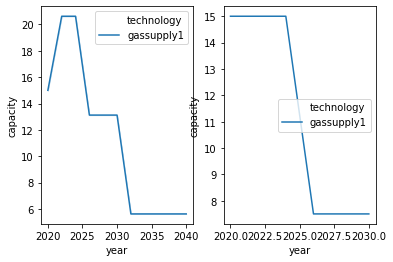

power sector:


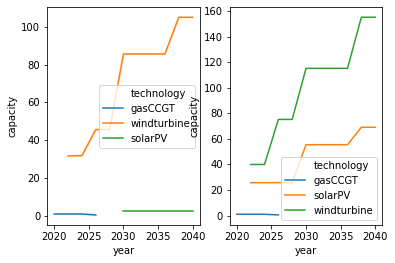

residential sector:


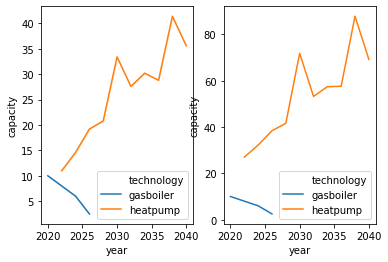

In [44]:
mca_capacity = pd.read_csv("../Results/MCACapacity.csv")

for name, sector in mca_capacity.groupby("sector"):
    print("{} sector:".format(name))
    fig, ax =plt.subplots(1,2)
    sns.lineplot(data=sector[sector.region=="R1"], x="year", y="capacity", hue="technology", ax=ax[0])
    sns.lineplot(data=sector[sector.region=="R2"], x="year", y="capacity", hue="technology", ax=ax[1])
    plt.show()
    plt.close()